In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import re

%matplotlib inline

In [2]:
pd.options.display.float_format = '{:.4f}'.format

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df = df[df.parent_category_name == "Животные"]

In [5]:
df.reset_index(inplace=True)

In [6]:
df.head()

,index,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,14,a97943ae8158,f643d87dd23c,Башкортостан,Туймазы,Животные,Собаки,Немецкая овчарка,NaN,NaN,Продаются щенки немецкой овчарки,"родились 1 февраля,три кобеля и сучка.",5000.0000,6,2017-03-23,Private,09ebf4b30bad5857a1f26cd18d907c1e888bbe718bb13d...,2133.0000,0.0000
1,24,065a4daba35f,19a5cd02c89b,Нижегородская область,Нижний Новгород,Животные,Товары для животных,NaN,NaN,NaN,Таблетки бравекто,"Таблетки ""Бравекто"" от блох и клещей по ценам:...",nan,310,2017-03-16,Company,22babf609cfcbca6b1d5ca81321fd6f58e873903c8fc0a...,843.0000,0.0000
2,31,1b080aa4a17d,68ee0dc56c28,Нижегородская область,Нижний Новгород,Животные,Другие животные,С/х животные,NaN,NaN,Бычки,продаю бычков на откорм веса от 150 до 220,130.0000,18,2017-03-28,Private,d507fc90a72ae0a6c5b74e0ab6cd723680450c3af4f466...,2195.0000,0.7850
3,53,f2d19da921ff,794b7b865f1d,Башкортостан,Стерлитамак,Животные,Аквариум,NaN,NaN,NaN,Аквариум ювель,"Отличный аквариум немецкого качества ЮВЕЛЬ, от...",15000.0000,11,2017-03-18,Private,a9e1abf3e922e17501352ec8f43a353f69e8b1a2395674...,2018.0000,0.0000
4,68,ffed80fe1b77,d1e5828ae1ee,Самарская область,Самара,Животные,Другие животные,С/х животные,NaN,NaN,Продаются поросята,"Продаются поросята от 1,5 мес.",3500.0000,21,2017-03-16,Private,NaN,nan,0.0000


In [7]:
df.category_name.unique()

array(['Собаки', 'Товары для животных', 'Другие животные', 'Аквариум',
       'Птицы', 'Кошки'], dtype=object)

In [8]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52470 entries, 0 to 52469
Data columns (total 19 columns):
index                   52470 non-null int64
item_id                 52470 non-null object
user_id                 52470 non-null object
region                  52470 non-null object
city                    52470 non-null object
parent_category_name    52470 non-null object
category_name           52470 non-null object
param_1                 32541 non-null object
param_2                 0 non-null object
param_3                 0 non-null object
title                   52470 non-null object
description             49181 non-null object
price                   38833 non-null float64
item_seq_number         52470 non-null int64
activation_date         52470 non-null object
user_type               52470 non-null object
image                   44295 non-null object
image_top_1             44295 non-null float64
deal_probability        52470 non-null float64
dtypes: float64(3), int6

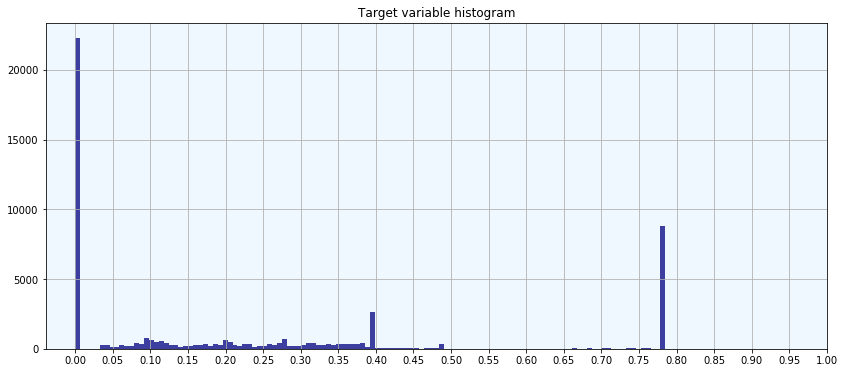

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
n, bins, patches = plt.hist(df.deal_probability, 120,  facecolor='navy', alpha=0.75)
tick_spacing = 0.1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(np.arange(0, 1.05, step=0.05))
ax.set_facecolor("aliceblue")
plt.grid()
plt.title("Target variable histogram")
plt.show()

In [10]:
 len(df.region.unique())

28

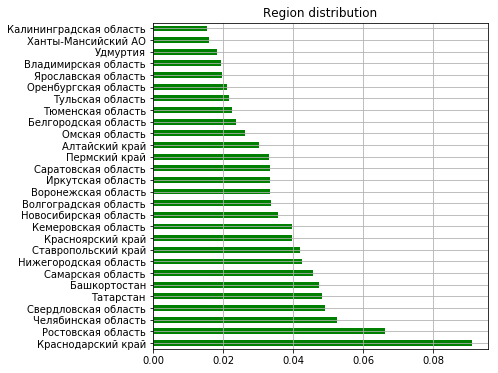

In [11]:
df.region.value_counts(1).plot(kind='barh', grid=True, title="Region distribution", figsize=(6,6), color="g")
plt.show()

In [12]:
len(df.city.unique())

1249

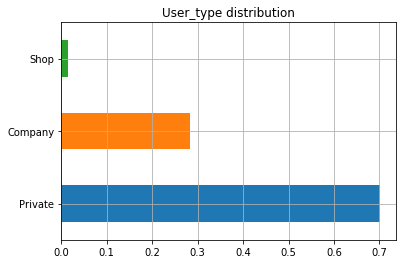

In [13]:
df.user_type.value_counts(1).plot(kind='barh', grid=True, title="User_type distribution")
plt.show()

/home/anatoliy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


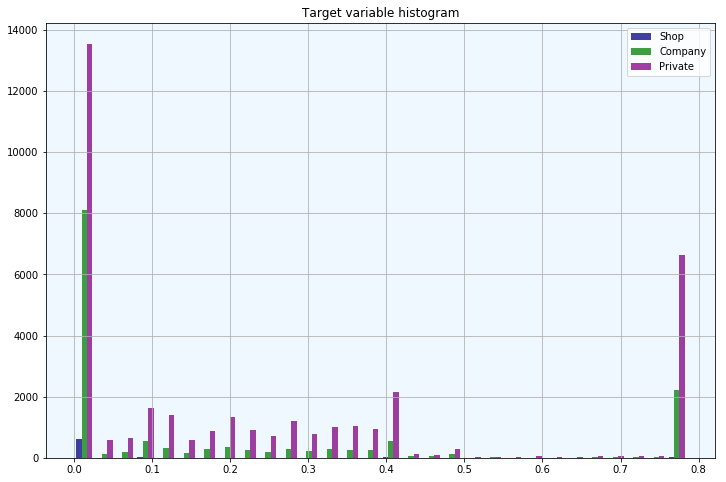

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
n, bins, patches = plt.hist((df[df.user_type == "Shop"].deal_probability, df[df.user_type == "Company"].deal_probability, 
                             df[df.user_type == "Private"].deal_probability), 30,  
                             color = ('navy', 'green', 'purple'), label = ("Shop", "Company", "Private"), alpha=0.75)
tick_spacing = 0.1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.legend()
ax.set_facecolor("aliceblue")
plt.grid()
plt.title("Target variable histogram")
plt.show()

In [15]:
df_high = df[df.deal_probability > 0.7]

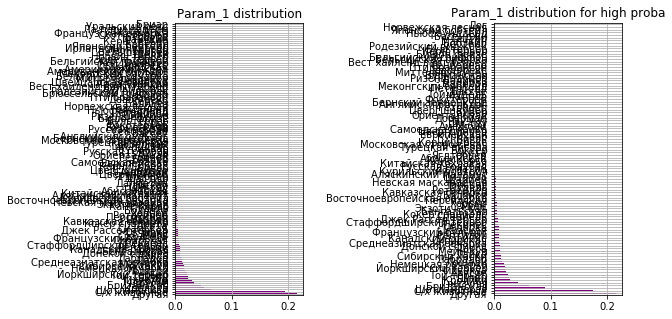

In [16]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=1.5)
plt.subplot(1, 2, 1)
df.param_1.value_counts(1).plot(kind='barh', grid=True, title="Param_1 distribution", figsize=(8,5), color="purple")
plt.subplot(1, 2, 2)
df_high.param_1.value_counts(1).plot(kind='barh', grid=True, title="Param_1 distribution for high proba", figsize=(8,5), color="purple")
plt.show()

In [17]:
df.title.value_counts(1)

Вязка                                                0.0127
Аквариум                                             0.0080
Отдам в добрые руки                                  0.0079
В добрые руки                                        0.0063
Котята                                               0.0058
Кролики                                              0.0052
Поросята                                             0.0050
Отдам в хорошие руки                                 0.0047
Щенки                                                0.0040
Цыплята                                              0.0038
Клетка                                               0.0033
Козлята                                              0.0031
Петухи                                               0.0028
Корова                                               0.0023
Отдам котят                                          0.0022
Клетка для грызунов                                  0.0020
Инкубационное яйцо                      

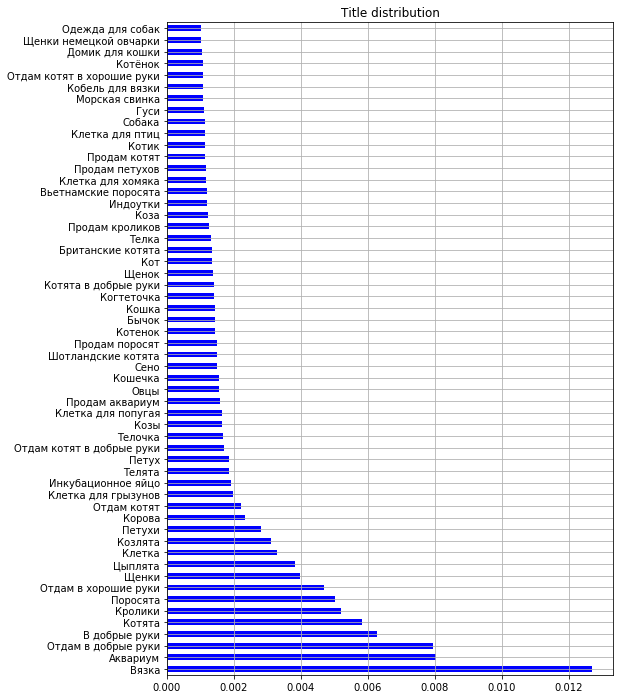

In [18]:
df.title.value_counts(1)[df.title.value_counts(1)>0.001].plot(kind='barh', grid=True, title="Title distribution", figsize=(8,12), color="b")
plt.show()

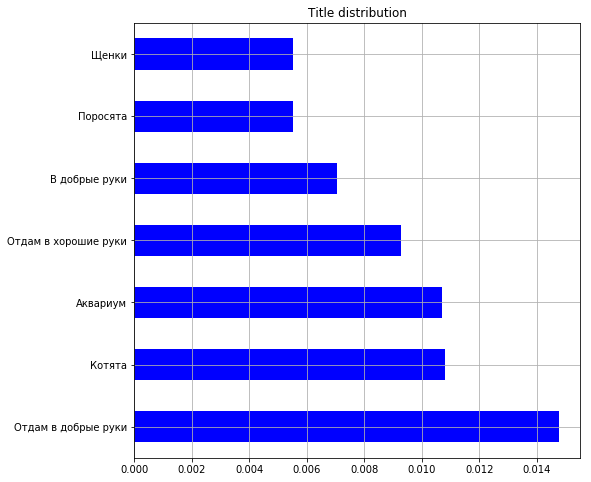

In [19]:
df_high.title.value_counts(1)[df_high.title.value_counts(1)>0.005].plot(kind='barh', grid=True, title="Title distribution", figsize=(8,8), color="b")
plt.show()

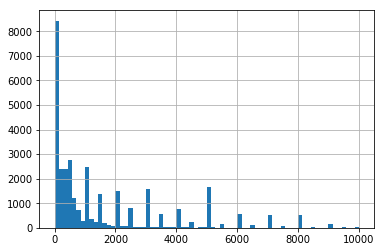

In [20]:
df[df.price<10000].price.hist(bins=70)

In [21]:
for i in df.param_1.unique():
    print (str(i) ,df[df.param_1 == i].price.median())

Немецкая овчарка 5000.0
nan nan
С/х животные 6000.0
Шотландская 2000.0
Лошади 60000.0
Другая 5.0
Британская 1500.0
Йоркширский терьер 10000.0
Бенгальская 10000.0
Кролики 700.0
Французский бульдог 8500.0
Сибирская 10.0
Той-терьер 4500.0
Грызуны 500.0
Канадский сфинкс 4000.0
Такса 1500.0
Русская голубая 10.0
Лайка 3000.0
Питбуль 4000.0
Персидская 1000.0
Донской сфинкс 2500.0
Другое 2500.0
Чихуахуа 8000.0
Спаниель 2000.0
Далматин 2500.0
Мейн-кун 10000.0
Среднеазиатская овчарка 7000.0
Стаффордширский терьер 5000.0
Мопс 10000.0
Ягдтерьер 5000.0
Акита 25000.0
Экзотическая 3000.0
Шпиц 18000.0
Сиамская 100.0
Пекинес 3400.0
Той-пудель 10000.0
Восточноевропейская овчарка 5000.0
Сибирский хаски 10000.0
Лабрадор 5500.0
Пудель 8000.0
Рептилии 1500.0
Тайская 500.0
Амфибии 140.0
Шарпей 5000.0
Бишон фризе 21000.0
Селкирк-рекс 3000.0
Китайская хохлатая 3250.0
Московская сторожевая 6000.0
Корниш-рекс 4250.0
Эрдельтерьер 12525.0
Ши-тцу 10000.0
Бассет 7500.0
Кане Корсо 15000.0
Боксер 1750.0
Ретривер 10000

In [22]:
sum(df.price.isnull())

13637

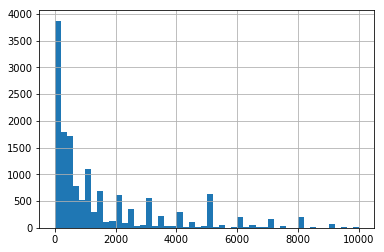

In [23]:
df[(df.price<10000) & (df.deal_probability == 0)].price.hist(bins=50)